# Supervised Classification Using AstroML (Scikit-learn)
## Identifying RR Lyrae stars
This notebook is intended to be a tutorial for performing supervised classificaton with AstroML, which is itself based on scikit learn. The tutorial will teach you how to load data, split it into a training and a test set, and perform supervised classification using the logistic regression. 

First, we do all the relevant imports. Note specially the imports from sklearn and astroML. Scikit-learn has good online tutorials that is good to check:

http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

And AstroML:

http://www.astroml.org/index.html

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
import matplotlib

from sklearn.linear_model import LogisticRegression
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

We now get the data and plot it:

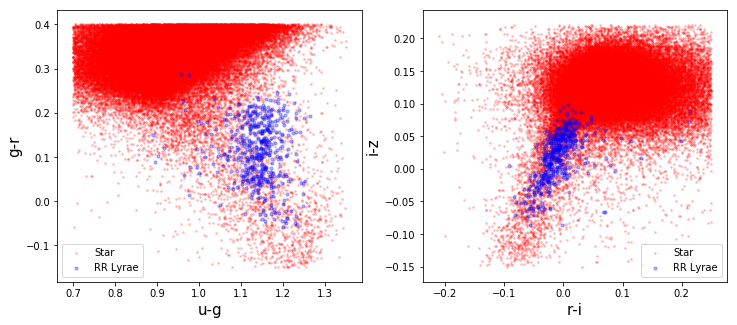

In [2]:
#get data 
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results

# Let's plot it
fig = plt.figure(figsize=(12.0, 5.0))

#fig.subplots(1,2)
ax = fig.add_subplot(121)
ax.scatter(X[y==0.0][:,1],X[y==0.0][:,0],s=6, lw=0,color='r',alpha=0.3,label='Star')
ax.scatter(X[y==1.0][:,1],X[y==1.0][:,0],s=10, lw=1,color='b',alpha=0.3,label='RR Lyrae')
ax.set_xlabel('u-g',size=15)
ax.set_ylabel('g-r',size=15)
ax.legend()
ax2 = fig.add_subplot(1,2,2)
ax2.scatter(X[y==0.0][:,3],X[y==0.0][:,2],s=6, lw=0,color='r',alpha=0.3,label='Star')
ax2.scatter(X[y==1.0][:,3],X[y==1.0][:,2],s=10, lw=1,color='b',alpha=0.3,label='RR Lyrae')
ax2.set_xlabel('r-i',size=15)
ax2.set_ylabel('i-z',size=15)
ax2.legend()

We now split the dataset into training and test sets. Remember that machines learning from looking at lots of data, so in general we want the training set to be large:

In [3]:
# Split into training & testing sets
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)
N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
print('N_train = ',N_train)
N_test = len(y_test)
print('N_test = ',N_test)
N_plot = 5000 + N_rr

N_train =  69855
N_test =  23286


In [4]:
# Let's define the logistic regression
def log_reg(x):
    return 1.0 / (1 + np.exp(-x))

In [5]:
# Let's extract a small random subset of the data
#y_shuffle = np.random.shuffle(np.arange(len(y)))
#print (np.arange(len(y)))

y1 = y[-1000:]
X1 = X[-1000:]

arr = np.arange(len(y1))
np.random.shuffle(arr)
#len(y[y==1.])
#len(y[y==0.])

X_t = X1[arr][0:100]
y_t = y1[arr][0:100]


Text(0,0.5,'i-z')

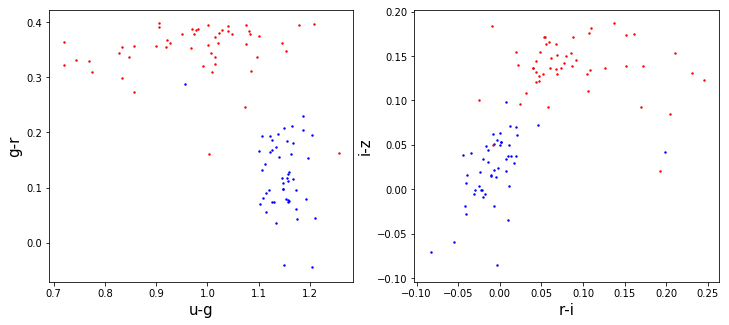

In [6]:
# Let's plot this subset
fig = plt.figure(figsize=(12.0, 5.0))

#fig.subplots(1,2)
ax = fig.add_subplot(121)
ax.scatter(X_t[y_t==1.0][:,1],X_t[y_t==1.0][:,0],s=6, lw=0,color='b')
ax.scatter(X_t[y_t==0.0][:,1],X_t[y_t==0.0][:,0],s=6, lw=0,color='r')
ax.set_xlabel('u-g',size=15)
ax.set_ylabel('g-r',size=15)
ax2 = fig.add_subplot(1,2,2)
ax2.scatter(X_t[y_t==1.0][:,3],X_t[y_t==1.0][:,2],s=6, lw=0,color='b')
ax2.scatter(X_t[y_t==0.0][:,3],X_t[y_t==0.0][:,2],s=6, lw=0,color='r')
ax2.set_xlabel('r-i',size=15)
ax2.set_ylabel('i-z',size=15)

Let us try to guess what the weights should be. We start with a vector of ones and see what probabilities we get for both the red and the blue dots. Let's assume that we want the probability to be large for the red dots (normal stars) and small for the blue (RR Lyrae).

(array([ 1.,  0.,  4.,  5.,  8.,  9.,  8., 12.,  3.,  1.]),
 array([0.76976783, 0.77927406, 0.78878029, 0.79828652, 0.80779276,
        0.81729899, 0.82680522, 0.83631145, 0.84581768, 0.85532391,
        0.86483014]),
 <a list of 10 Patch objects>)

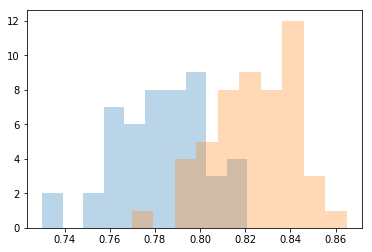

In [7]:

weights = np.ones(4)

# First the blue dots
prob_blue = []
for features in X_t[y_t==1.0]:
    prob_blue.append(log_reg(np.dot(weights,features)))

# Now the red
prob_red = []
for features in X_t[y_t==0.0]:
    prob_red.append(log_reg(np.dot(weights,features)))
plt.hist(prob_blue,alpha=0.3)
plt.hist(prob_red,alpha=0.3)

It looks like we do a reasonable job if the weights are just ones (uniform weights), but all objects would still be calssifeid as normal stars. Can we improve this? Let's see. Let us try to guess what the weights should be. We start with a vector of ones and see what probabilities we get for both the red and the blue dots. Let's assume that we want the probability to be large for the red dots and small for the blue.

(array([ 1.,  1.,  0.,  1.,  0.,  5.,  8., 22., 12.,  1.]),
 array([0.42260223, 0.44244442, 0.46228662, 0.48212881, 0.50197101,
        0.52181321, 0.5416554 , 0.5614976 , 0.58133979, 0.60118199,
        0.62102418]),
 <a list of 10 Patch objects>)

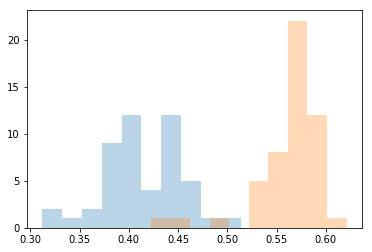

In [8]:

#weights = np.array([2.0,-0.5,2.0,0.2])
weights = np.array([1.5,-0.5,1.5,0.2])

# First the blue dots
prob_blue = []
for features in X_t[y_t==1.0]:
    prob_blue.append(log_reg(np.dot(weights,features)))

# Now the red
prob_red = []
for features in X_t[y_t==0.0]:
    prob_red.append(log_reg(np.dot(weights,features)))
plt.hist(prob_blue,alpha=0.3)
plt.hist(prob_red,alpha=0.3)

We can do better if we think a bit. It is not perfect, but in principle we could use the current weights to have an initial guess on the class of an object.

In [9]:
#----------------------------------------------------------------------
# perform Classification
classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)


for nc in Ncolors:
    clf = LogisticRegression(class_weight='balanced')
    clf.fit(X_train[:, :nc], y_train)
    y_pred = clf.predict(X_test[:, :nc])

    classifiers.append(clf)
    predictions.append(y_pred)

completeness, contamination = completeness_contamination(predictions, y_test)

print ("completeness", completeness)
print ("contamination", contamination)

completeness [0.98540146 1.         1.         1.        ]
contamination [0.88588335 0.84143519 0.8416185  0.84069767]


In [10]:
#------------------------------------------------------------
# Compute the decision boundary
clf = classifiers[1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))

print (clf.intercept_)
print (clf.coef_)

# Here we predict the probabilities given our trained algorithm
Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

[-9.85508091]
[[-24.38288352  14.65695219]]


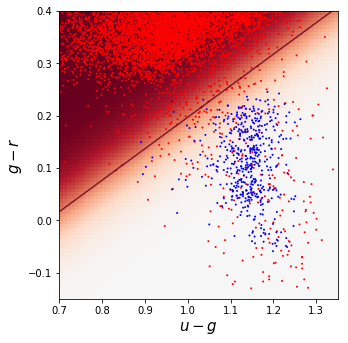

In [12]:
#----------------------------------------------------------------------
# plot the results
pgf_with_rc_fonts = {"pgf.texsystem": "pdflatex"}
matplotlib.rcParams.update(pgf_with_rc_fonts)

from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

fig = plt.figure(figsize=(10, 5.0))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=cm_bright, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=cm, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 2)

#ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
#ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
ax.contour(xx, yy, Z, [0.5], cmap=cm, alpha=.8)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$',size=15)
ax.set_ylabel('$g-r$',size=15)

# plot completeness vs Ncolors
#ax = fig.add_subplot(222)

#ax.plot(Ncolors, completeness, 'o-k', ms=6, color='g')

#ax.xaxis.set_major_locator(plt.MultipleLocator(1))
#ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
#ax.xaxis.set_major_formatter(plt.NullFormatter())

#ax.set_ylabel('completeness',size=15)
#ax.set_xlim(0.5, 4.5)
#ax.set_ylim(-0.1, 1.1)
#ax.grid(True)

# plot contamination vs Ncolors
#ax = fig.add_subplot(224)
#ax.plot(Ncolors, contamination, 'o-k', ms=6, color='g')

#ax.xaxis.set_major_locator(plt.MultipleLocator(1))
#ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
#ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
#ax.set_xlabel('N colors',size=15)
#ax.set_ylabel('contamination',size=15)
#ax.set_xlim(0.5, 4.5)
#ax.set_ylim(-0.1, 1.1)
#ax.grid(True)

plt.show()

## Star-QSO classification using random forest
We will try to classify QSOs and stars based on their colors. For that we will use a Random Forest.

In [13]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.utils import split_samples

#from sklearn.metrics import roc_curve
#from sklearn.naive_bayes import GaussianNB
#from sklearn.lda import LDA
#from sklearn.qda import QDA
#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Fetch data and split into training and test samples
from astroML.datasets import fetch_dr7_quasar
from astroML.datasets import fetch_sdss_sspp

quasars = fetch_dr7_quasar()
stars = fetch_sdss_sspp()

# Truncate data for speed
quasars = quasars[::5]
stars = stars[::5]

# stack colors into matrix X
Nqso = len(quasars)
Nstars = len(stars)
X = np.empty((Nqso + Nstars, 4), dtype=float)

X[:Nqso, 0] = quasars['mag_u'] - quasars['mag_g']
X[:Nqso, 1] = quasars['mag_g'] - quasars['mag_r']
X[:Nqso, 2] = quasars['mag_r'] - quasars['mag_i']
X[:Nqso, 3] = quasars['mag_i'] - quasars['mag_z']

X[Nqso:, 0] = stars['upsf'] - stars['gpsf']
X[Nqso:, 1] = stars['gpsf'] - stars['rpsf']
X[Nqso:, 2] = stars['rpsf'] - stars['ipsf']
X[Nqso:, 3] = stars['ipsf'] - stars['zpsf']

y = np.zeros(Nqso + Nstars, dtype=int)
y[:Nqso] = 1

# split into training and test sets
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.9, 0.1],
                                                     random_state=0)

In [14]:
print(X_train)

[[ 1.47299957  0.61300087  0.27400017  0.1439991 ]
 [ 1.42299938  0.50600052  0.13199997  0.06599998]
 [ 0.04599953  0.48800087 -0.20100021 -0.20599937]
 ...
 [ 1.65699959  0.53800011  0.20300007  0.10900021]
 [ 0.74500084  0.33499908  0.12200165  0.05399895]
 [ 1.43300056  0.74600029  0.29999924  0.14699936]]


In [16]:
clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

In [17]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
score = clf.score(X_test, y_test)

In [19]:
print(score)

0.973559635146057
